In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Odds Ratios ##

Binomial $(n, p)$ probabilities involve powers and factorials, both of which are difficult to compute when $n$ is large. This section is about simplifying the computation of the entire distribution. The result also helps us understand the shape of binomial histograms.

In [2]:
# VIDEO: Consecutive Odds
from IPython.display import YouTubeVideo

YouTubeVideo("-5suvosCTCE")

### Consecutive Odds Ratios ###
Fix $n$ and $p$, and let $P(k)$ be the binomial $(n, p)$ probability of $k$. That is, let $P(k)$ be the chance of getting $k$ successes in $n$ independent trials with probability $p$ of success on each trial.

The idea is to start at the left end of the distribution, with the term

$$
P(0) ~ = ~ (1-p)^n
$$

Then we will build up the distribution recursively from left to right, one possible value at a time.

To do this, we have to know how the probabilities of consecutive values are related to each other. For $k \ge 1$, define the *$k$th consecutive odds ratio*

$$
R(k) = \frac{P(k)}{P(k-1)}
$$

These ratios help us calculate $P(k)$ recursively.

$$
\begin{align*}
P(0) &= (1-p)^n \\ \\
P(1) &= P(0) \cdot \frac{P(1)}{P(0)} = P(0)R(1) \\ \\
P(2) &= P(1)R(2)
\end{align*}
$$

and so on.

Even though we already have a formula for the binomial probabilities, building the distribution using consecutive ratios is better computationally and also helps us understand the shape of the distribution.

In [3]:
# VIDEO: Binomial Consecutive Odds

YouTubeVideo("F8lx8OmLsXE")

### Binomial Consecutive Odds Ratios ###

How is this more illuminating than plugging into the binomial formula? To see this, fix $k \ge 1$ and calculate the ratio $R(k)$.

$$
\begin{align*}
R(k) &= \frac{\binom{n}{k}p^k(1-p)^{n-k}}
{\binom{n}{k-1}p^{k-1}(1-p)^{n-k+1}} \\ \\
&= \frac{n-k+1}{k} \cdot \frac{p}{1-p} ~~~
\text{(after cancellation)} 
\end{align*}
$$

Notice that the formulas for $R(k)$ are simple. This makes it easy to compute $P(k)$ recursively. For example, if $n \ge 3$, we can compute $P(3)$ as

$$
P(3) = (1-p)^n \big{(} \frac{n - 1 + 1}{1} \cdot \frac{p}{1-p} \big{)}
\big{(} \frac{n - 2 + 1}{2} \cdot \frac{p}{1-p} \cdot \big{)}
\big{(} \frac{n - 3 + 1}{3} \cdot \frac{p}{1-p} \cdot \big{)}
$$

```{admonition} Quick Check
In the binomial $(60, 2/3)$ distribution, $P(35) = 0.04207955004383654$. Use this (but no `scipy` or combinatorics) to find $P(36)$.

```

```{admonition} Answer
:class: dropdown
Multiply by $\frac{61-36}{36}\cdot 2$ to get $0.05844381950532852$.

```

### Shapes of Binomial Histograms ###
Now observe that comparing $R(k)$ to 1 tells us whether the histogram is going up, staying level, or going down at $k$.

$$
\begin{align*}
R(k) > 1 &\iff P(k) > P(k-1) \\
R(k) = 1 &\iff P(k) = P(k-1) \\
R(k) < 1 &\iff P(k) < P(k-1) 
\end{align*}
$$

Note also that the form

$$
R(k) = \big{(} \frac{n+1}{k} - 1 \big{)} \cdot \frac{p}{1-p}
$$

tells us the the ratios are a *decreasing function of $k$*. In the formula, $n$ and $p$ are the parameters of the distribution and hence constant. It is $k$ that varies, and $k$ appears in the denominator.

This implies that once $R(k) < 1$ for some $k$, it will remain less than 1 for all larger $k$. In other words, once the histogram starts going down, it will keep going down. It cannot come back up again. 

That is why binomial histograms are either non-increasing or non-decreasing, or they go up and come down. But they can't look like waves on the seashore. They can't go up, come down, and go up again.

In [4]:
# VIDEO: Odds and the Mode

YouTubeVideo("--V_Z2QBc4w")

Let's visualize this for a $n = 23$ and $p = 0.7$, two parameters that have no significance other than being our choice to use in this example.

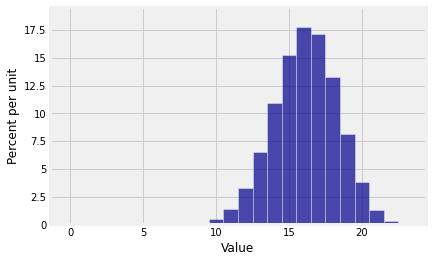

In [5]:
n = 23
p = 0.7
k = range(n+1)
bin_23_7 = stats.binom.pmf(k, n, p)
bin_dist = Table().values(k).probabilities(bin_23_7)
Plot(bin_dist)

In [6]:
# It is important to define k as an array here,
# so you can do array operations
# to find all the ratios at once.
k = np.arange(1, n+1, 1)
((n - k + 1)/k)*(p/(1-p))

array([ 53.66666667,  25.66666667,  16.33333333,  11.66666667,
         8.86666667,   7.        ,   5.66666667,   4.66666667,
         3.88888889,   3.26666667,   2.75757576,   2.33333333,
         1.97435897,   1.66666667,   1.4       ,   1.16666667,
         0.96078431,   0.77777778,   0.61403509,   0.46666667,
         0.33333333,   0.21212121,   0.10144928])

What Python is helpfully telling us is that the invisible bar at 1 is 53.666... times larger than the even more invisible bar at 0. The ratios decrease after that but they are still bigger than 1 through $k = 16$. The histogram rises till it reaches its peak at $k = 16$. You can see that $R(16) = 1.1666 > 1$. Then the ratios drop below one, so the histogram starts going down.

### Mode of the Binomial ###
A *mode* of a discrete distribution is a possible value that has the highest probability. There may be more than one such value, so there may be more than one mode.

We have seen that once the ratio $R(k)$ drops below 1, it stays below 1, so the histogram keeps falling. To identify the mode, therefore, we will find all values of $k$ such that $R(k) \ge 1$.

Let $q = 1-p$. Every value $k$ for which $R(k) \ge 1$ must satisfy

$$
\big{(} \frac{n+1}{k} - 1 \big{)} \frac{p}{q} ~ \ge ~ 1
$$

That is,

$$
\frac{n+1}{k} ~ \ge ~ \frac{q}{p} + 1 ~ = ~ \frac{1}{p}
$$

which is equivalent to

$$
k ~ \le ~ (n+1)p
$$

We have shown that for all $k$ in the range 0 through the integer part of $(n+1)p$, the histogram rises; for larger $k$, it falls.

Therefore the peak of the histogram is at the largest $k$ in this range. That's the integer part of $(n+1)p$. 

So the integer part of $(n+1)p$ is a mode of the binomial.

Because the odds ratios are non-decreasing in $k$, the only way in which there can be more than one mode is if there is a $k$ such that $R(k) = 1$. In that case, $P(k) = P(k-1)$ and therefore both $k$ and $k-1$ will be modes. To summarize:

The **mode** of the binomial $(n, p)$ distribution is the integer part of $(n+1)p$. If $(n+1)p$ is an integer, then $(n+1)p - 1$ is also a mode. 

To see that this is consistent with what we observed in our numerical example above, let's calculate $(n+1)p$ in that case.

In [7]:
(n+1) * p

16.799999999999997

The integer part of $(n+1)p$ is 16, which is the mode that we observed.

But in fact, $np$ is a more natural quantity to calculate. For example, if you are counting the number of heads in 100 tosses of a coin, then the distribution is binomial $(100, 1/2)$ and you naturally expect $np = 50$ heads. You don't want to be worrying about $101 \times (1/2)$. 

In fact you don't have to worry when $n$ is large, because then $np$ and $(n+1)p$ are pretty close. In a later section we will examine a situation in which you can use $np$ to get an approximation to the shape of the binomial distribution when $n$ is large.